# SWMAL Exercise

## Model capacity and under/overfitting

### Qa) Explain the polynomial fitting via code review

In the code below the underfitting and overfitting concepts are demonstrated in polynomial regression.

The first function definition `true_fun` is the true function we want to fit, and the second function `GenerateData` generates the data samples from the true function, with some added noise. 

Next part that is defined is the degress which are used to fit the polynomial regression model.  

The next part is the for loop, where we fit the polynomial regression models of different degrees (1, 4, 15) to the data, and evaluates their performance using cross-validation. 

The true function is a cosine curve with added random noise. The code uses scikit-learn's Pipeline to create a polynomial regression model and calculates mean squared error scores for each degree. The results show how model complexity (degree) affects performance, highlighting the trade-off between underfitting and overfitting. 

Finally the loop ends with prints of the cross-validation sub-scores for each fold.

Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

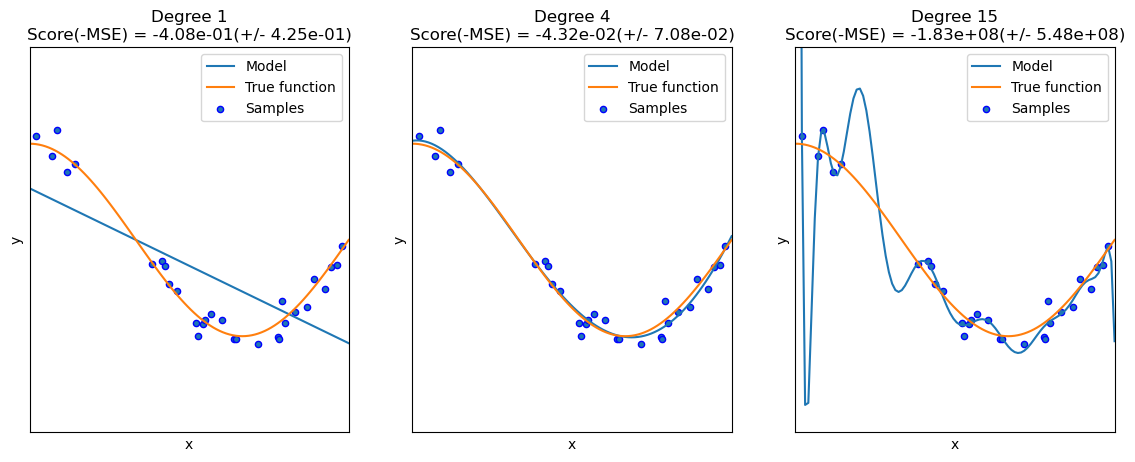

OK


In [3]:
# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

### Qb) Explain the capacity and under/overfitting concept

A low degres polynomial regression model will underfit the data, because it will not be able to recoqnize the patternz in the data. This gives a result with a high bias and low variance. We notice this in the plot also where the model is not able to fit the data well and is way off. 

With the medium degress we get a more balanced fit of the data, and the model is able to recoqnize the patternz in the data. This gives a result with a low bias and low variance. We notice this in the plot also where the model is able to fit the data well and almost follows the true function.

Lastly we have a high degree where overfitting is happening. The model is able to fit the data very well, but it is not able to recoqnize the patternz in the data. This gives a result with a low bias and high variance. We notice this in the plot also where the model is able to fit the data very well, but is not able to follow the true function. The model is overfitting the data and is not able to generalize well, this is noticable with how the model correlates very closely with the samples and tries to hit/touch all of them. 

### Qc) Score method

The scoring method `neg_mean_squared_error` is the MSE but negated so instead of a high score being good, a low score is good.  

In the `MSE` the `J-function` is going from bein a cost function to be more of a score function, because we want to maximize some measure of model performance.

If we set it to `mean_squared_error` then it raises an exception.  
![exception.png](exeception.png) 

This happens because the MSE has minimum theoretical score of 0. 
The highest score is without any upper bound so can grow very large when the actual values are far from the predictions.

The high degree model (15) has a big negative value, because the samples are very far form the predictions. Given that it is a negative value, it is a very good score that indicate the model is overfitting the data.
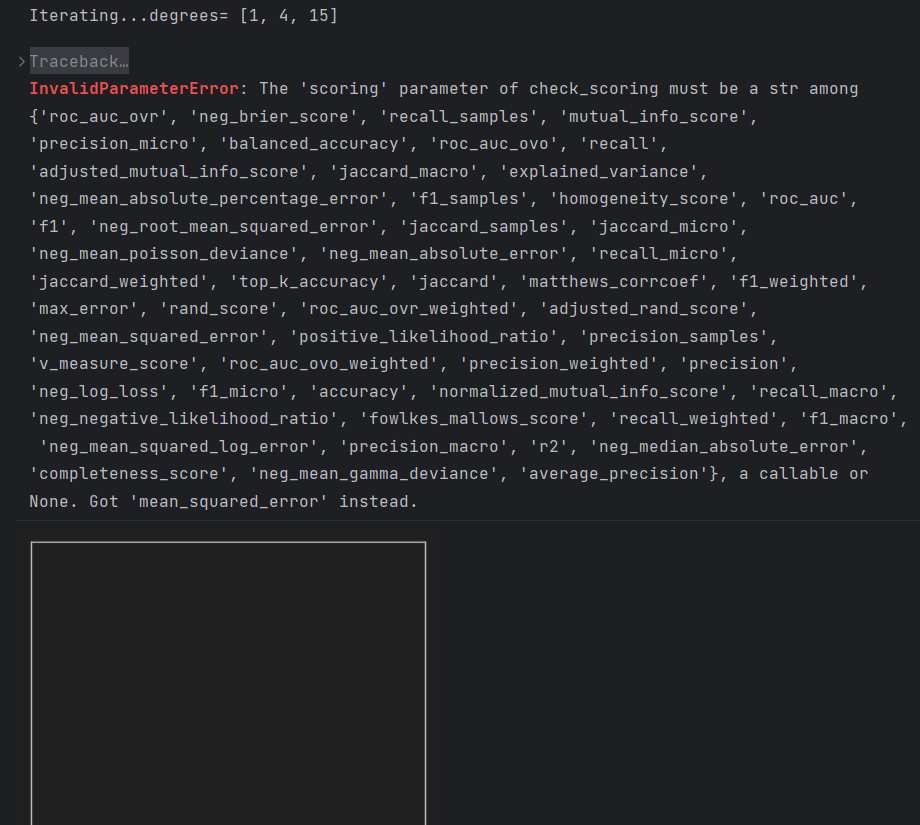